In [169]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [170]:
#load dataset
df=pd.read_csv('/content/drive/MyDrive/APIES_AI WORKS/Brest_cancer/breast-cancer.data')
df

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [171]:
df.columns=['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irrediant']
df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrediant
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [172]:
df.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrediant
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [173]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrediant'],
      dtype='object')

In [174]:
df.dtypes

,0
Class,object
age,object
menopause,object
tumor_size,object
inv_nodes,object
node_caps,object
deg_malig,int64
breast,object
breast_quad,object
irrediant,object


In [175]:
df.shape

(285, 10)

In [176]:
#count the unique values
for i in df.select_dtypes( include=['object']).columns:
  uniqe_val=df[i].dropna().unique()
  print(f"column '{i}' ({len(uniqe_val)} 'unique_value')")
  print(uniqe_val)
  print('*'*30)

column 'Class' (2 'unique_value')
['no-recurrence-events' 'recurrence-events']
******************************
column 'age' (6 'unique_value')
['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
******************************
column 'menopause' (3 'unique_value')
['premeno' 'ge40' 'lt40']
******************************
column 'tumor_size' (11 'unique_value')
['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
******************************
column 'inv_nodes' (7 'unique_value')
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
******************************
column 'node_caps' (3 'unique_value')
['no' 'yes' '?']
******************************
column 'breast' (2 'unique_value')
['right' 'left']
******************************
column 'breast_quad' (6 'unique_value')
['right_up' 'left_low' 'left_up' 'right_low' 'central' '?']
******************************
column 'irrediant' (2 'unique_value')
['no' 'yes']
******************************


In [177]:
#count the ? in columns
for col in df.columns:
  q_count=df[col][df[col]=='?'].count()
  print(f"columns '{col}: ? ={q_count}")


columns 'Class: ? =0
columns 'age: ? =0
columns 'menopause: ? =0
columns 'tumor_size: ? =0
columns 'inv_nodes: ? =0
columns 'node_caps: ? =8
columns 'deg_malig: ? =0
columns 'breast: ? =0
columns 'breast_quad: ? =1
columns 'irrediant: ? =0


In [178]:
df[df['breast_quad']=='?']

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrediant
205,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [179]:
df[df['node_caps']=='?']

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrediant
144,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
162,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
182,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
232,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
262,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [180]:
#checking the  NaN value in this dataset
df.isnull().sum()

,0
Class,0
age,0
menopause,0
tumor_size,0
inv_nodes,0
node_caps,0
deg_malig,0
breast,0
breast_quad,0
irrediant,0


In [181]:
df=df.drop(['breast_quad','node_caps'],axis=1)

In [182]:
df

,Class,age,menopause,tumor_size,inv_nodes,deg_malig,breast,irrediant
0,no-recurrence-events,40-49,premeno,20-24,0-2,2,right,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,2,left,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,2,right,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,2,right,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,2,left,no
...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,2,left,no
281,recurrence-events,30-39,premeno,20-24,0-2,3,left,yes
282,recurrence-events,60-69,ge40,20-24,0-2,1,right,no
283,recurrence-events,40-49,ge40,30-34,3-5,3,left,no


In [183]:
df.shape

(285, 8)

In [184]:
#checking the proportion of missingness
import numpy as np
df_missing = df.replace('?',np.nan) #missing value would replaced as nan because we can fill the nan values using meean,median,mode..
missing_proportions = df_missing.isna().mean()
for col,prop in missing_proportions.items():
    if prop:
      print(f"column '{col}':{prop:.2%} missing")


In [185]:
#drop the 1 missing value from breast quad
df.replace('?',np.nan,inplace=True)

#drop the row with missing value
colum_to_check=['breast']

drop_mask =(df[colum_to_check].isna().any(axis=1))

df=df[~drop_mask].reset_index(drop=True)

In [186]:
df.shape

(285, 8)

Exploratory Data Analysis and Data Engineering


In [212]:
df['irrediant'].value_counts()


,count
irrediant,
no,217
yes,68


In [213]:
df['irrediant']=df['irrediant'].replace('no',0)
df['irrediant']=df['irrediant'].replace('yes',1)

/tmp/ipython-input-1067486432.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['irrediant']=df['irrediant'].replace('yes',1)


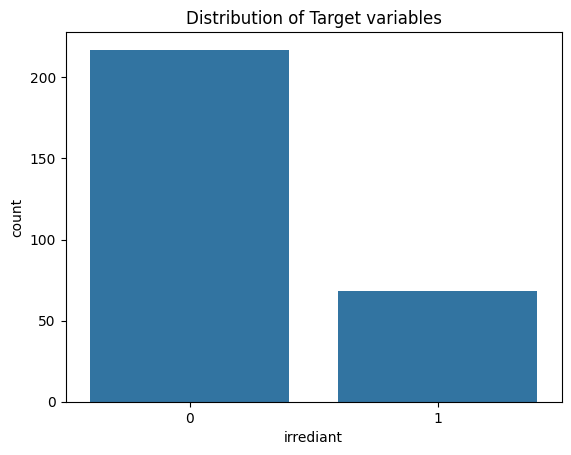

In [214]:
# graph plotting

sns.countplot(x='irrediant',data=df)
plt.title('Distribution of Target variables')
plt.show()


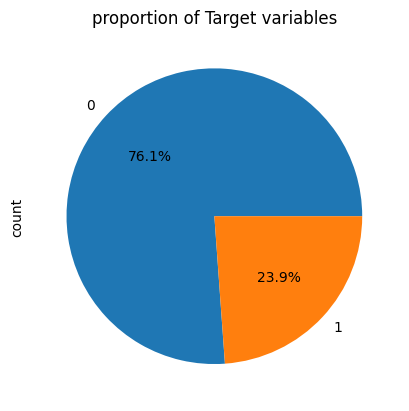

In [215]:
df.irrediant.value_counts().plot.pie(autopct='%.1f%%')
plt.title('proportion of Target variables')
plt.show()

In [188]:
#our data is imbalanced

In [189]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'deg_malig',
       'breast', 'irrediant'],
      dtype='object')

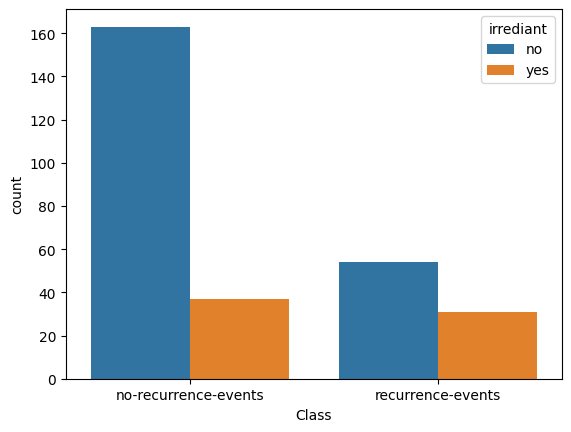

Class
no-recurrence-events    0.701754
recurrence-events       0.298246
Name: proportion, dtype: float64


In [190]:
sns.countplot(x='Class',hue='irrediant',data=df)
plt.show()
print(df.Class.value_counts(normalize=True))

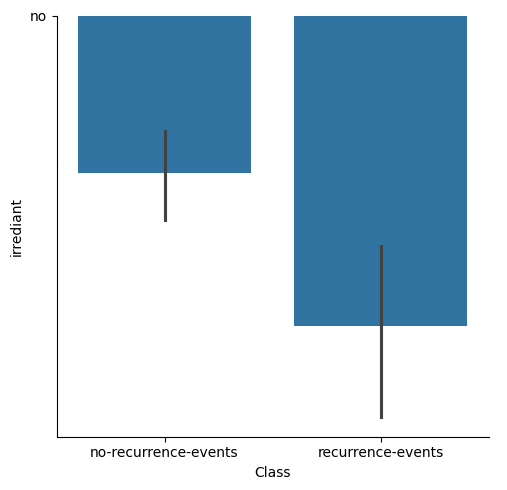

In [191]:
sns.catplot(x='Class',y='irrediant',data=df,kind='bar',height=5)
plt.show()

In [192]:
df['age']

,age
0,40-49
1,40-49
2,60-69
3,40-49
4,60-69
...,...
280,30-39
281,30-39
282,60-69
283,40-49


In [193]:
#Age

In [194]:
df['age']=df['age'].map({'40-49':45 ,'60-69':65, '50-59':55, '30-39':35, '70-79':75, '20-29':25})


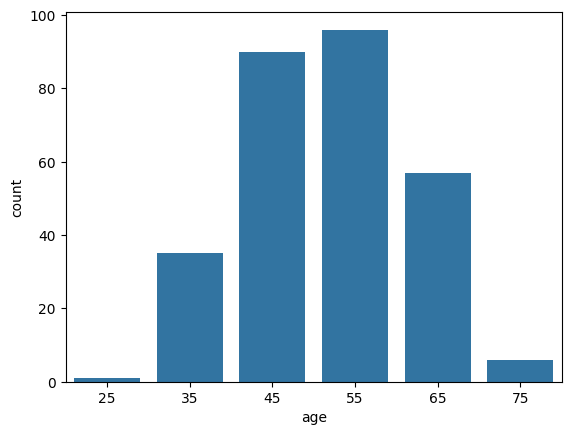

In [195]:
sns.countplot(x='age',data=df)
plt.show()

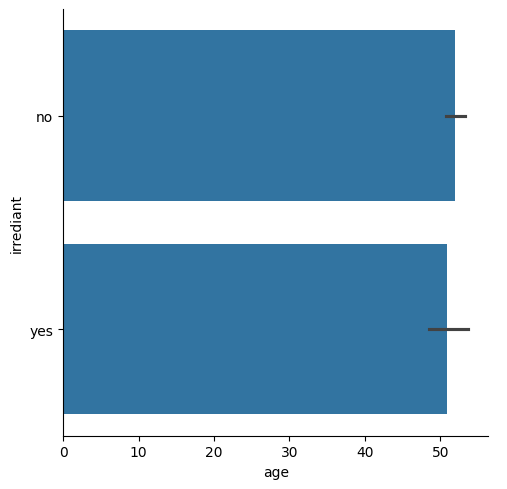

In [196]:
sns.catplot(x='age',y='irrediant',data=df,kind='bar',height=5)
plt.show()

In [197]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'deg_malig',
       'breast', 'irrediant'],
      dtype='object')

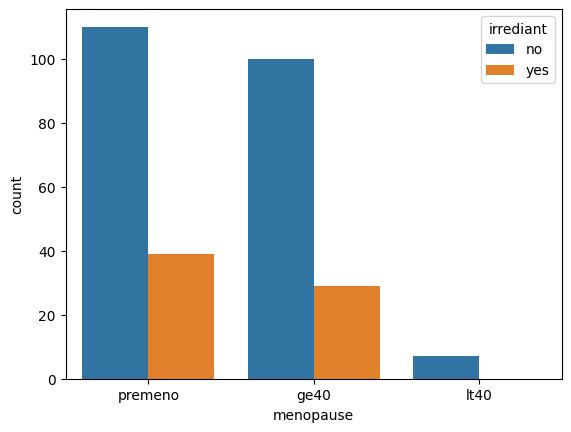

In [198]:
sns.countplot(x='menopause',data=df,hue='irrediant')
plt.show()

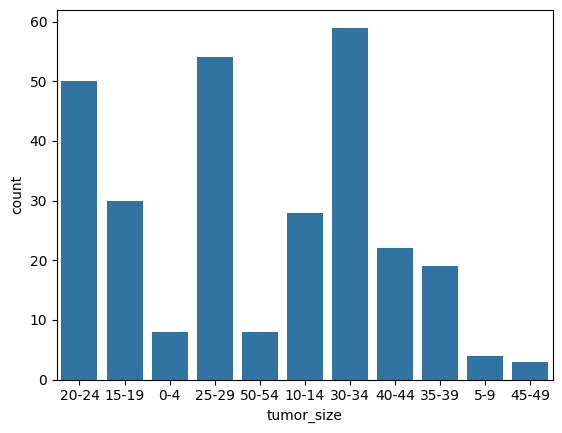

tumor_size
30-34    20.701754
25-29    18.947368
20-24    17.543860
15-19    10.526316
10-14     9.824561
40-44     7.719298
35-39     6.666667
0-4       2.807018
50-54     2.807018
5-9       1.403509
45-49     1.052632
Name: proportion, dtype: float64


In [199]:
sns.countplot(x='tumor_size',data=df)
plt.show()
print(df.tumor_size.value_counts(normalize=True)*100)

In [200]:
df['tumor_size']=df['tumor_size'].replace(0-4,10-14)
df['tumor_size']=df['tumor_size'].replace(5-9,10-14)
df['tumor_size']=df['tumor_size'].replace(50-54,40-44)
df['tumor_size']=df['tumor_size'].replace(45-49,40-44)

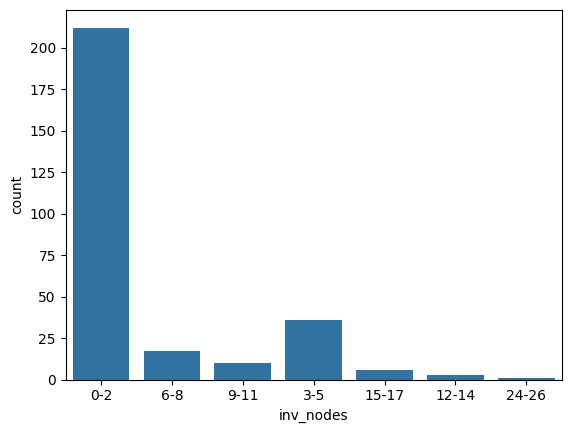

inv_nodes
0-2      74.385965
3-5      12.631579
6-8       5.964912
9-11      3.508772
15-17     2.105263
12-14     1.052632
24-26     0.350877
Name: proportion, dtype: float64


In [201]:
sns.countplot(x='inv_nodes',data=df)
plt.show()
print(df.inv_nodes.value_counts(normalize=True)*100)

In [202]:
df['inv_nodes']=df['inv_nodes'].replace(12-14,9-11)
df['inv_nodes']=df['inv_nodes'].replace(15-17,9-11)
df['inv_nodes']=df['inv_nodes'].replace(6-8,3-11)

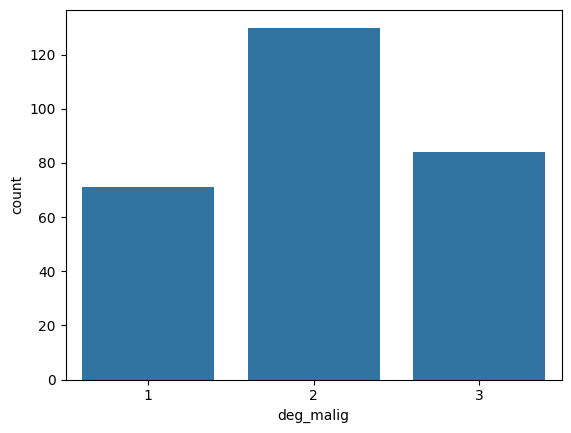

deg_malig
2    45.614035
3    29.473684
1    24.912281
Name: proportion, dtype: float64


In [203]:
sns.countplot(x='deg_malig',data=df)
plt.show()
print(df.deg_malig.value_counts(normalize=True)*100)

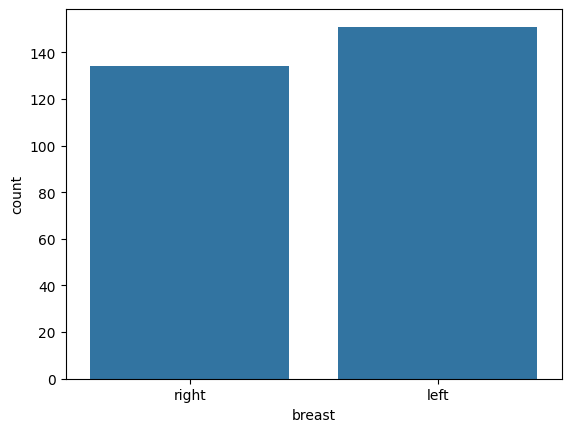

breast
left     0.529825
right    0.470175
Name: proportion, dtype: float64


In [204]:
sns.countplot(x= 'breast',data=df)
plt.show()
print(df.breast.value_counts(normalize=True))

In [205]:
#Encoding chategorical variable


In [206]:
df['breast']=df['breast'].map({'left':0,'right':1})

In [207]:
df['menopause']=df['menopause'].map({'premeno':0,'ge40':1,'It40':2})

In [208]:
df['Class']=df['Class'].map({'recurrence-events':0,'no-recurrence-events':1})

In [209]:
df['inv_nodes']=df['inv_nodes'].replace(12-14,9-11)
df['inv_nodes']=df['inv_nodes'].replace(15-17,9-11)
df['inv_nodes']=df['inv_nodes'].replace(6-8,3-11)

In [210]:
df['inv_nodes']=df['inv_nodes'].map({'0-2':0,'3-5':1,'9-11':3,'12-14':5})

In [216]:
df['tumor_size']=df['tumor_size'].map({'30-34':0 ,'25-29': 1,'20-24': 2,'15-19':3 ,'10-14': 4,
                                       '35-39': 5,'0-4': 6,'50-54':7  ,'45-49':8 })

In [217]:
df.dtypes

,0
Class,int64
age,int64
menopause,float64
tumor_size,float64
inv_nodes,float64
deg_malig,int64
breast,int64
irrediant,int64


Text(0.5, 1.0, 'correlation Heatmap')

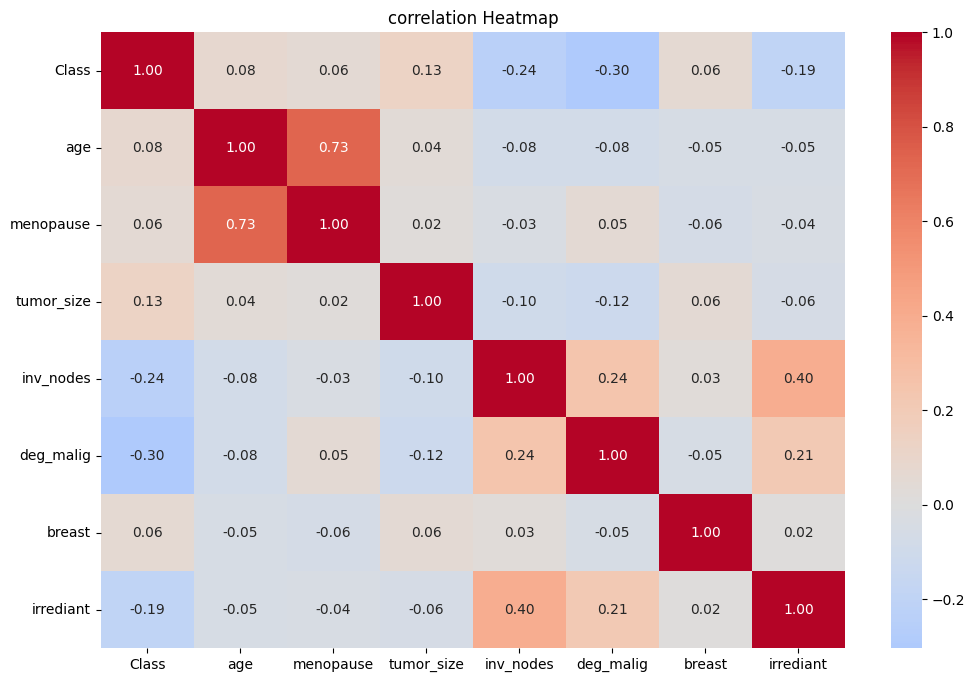

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=['Class','age','menopause','tumor_size','inv_nodes','deg_malig','breast','irrediant']

numeric_cols = df[cols].select_dtypes(include=['number']).columns.tolist()

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',center=0)

plt.title('correlation Heatmap')


In [221]:
# Select numeric columns
num_cols = df.select_dtypes(include=np.number).columns


#config
SKEW_THRESHOLD=2
KURT_THRESHOLD=2
ZERO_RATIO_THRESHOLD=0.10  #2%

#make a copy to avoid modifying original directory
df_transformed= df.copy()

#store stats for report
stats_list=[]

for col in num_cols:
  series = df_transformed[col]
  skew_before = series.skew()
  kurt_before = series.kurtosis()
  std_before = series.std()


#default value (no transformation)

  transform_type = 'NA'
  transform_needed = 'No'
  skew_after = skew_before
  kurt_after = kurt_before
  std_after = std_before


 #Transformation logic
  if abs(skew_before) > SKEW_THRESHOLD and abs(kurt_before) > KURT_THRESHOLD :
    zero_ratio =(series ==0).mean()

    if zero_ratio <= ZERO_RATIO_THRESHOLD and (series>0).all():
      transform_type = 'log'
      df_transformed[col] =np.log(series)
    else:
      transform_type ='log1p'
      df_transformed[col] = np.log1p(series.clip(lower=0))  #avoids negative

    transform_needed = 'Yes'
    skew_after = df_transformed[col].skew()
    kurt_after = df_transformed[col].kurtosis()
    std_after = df_transformed[col].std()

  stats_list.append({'numeric_column':col,
                     'skew_before':skew_before,
                     'kurtosis_before':kurt_before,
                     'std_before':std_before,
                      'log_transform_needed':transform_needed,
                      'log_type':transform_type,
                      'skew_after': skew_after,
                      'kurtosis_after': kurt_after,
                      'std_after': std_after})


# Create before/after stats report
stat_df = pd.DataFrame(stats_list)

# Results
stat_df


,numeric_column,skew_before,kurtosis_before,std_before,log_transform_needed,log_type,skew_after,kurtosis_after,std_after
0,Class,-0.886683,-1.222421,0.458293,No,NA,-0.886683,-1.222421,0.458293
1,age,0.014440,-0.609470,10.087583,No,NA,0.014440,-0.609470,10.087583
2,menopause,0.145042,-1.993356,0.499604,No,NA,0.145042,-1.993356,0.499604
3,tumor_size,0.826015,-0.008724,1.992849,No,NA,0.826015,-0.008724,1.992849
4,inv_nodes,3.549633,14.037882,0.822431,Yes,log1p,2.364403,5.082683,0.385623
5,deg_malig,-0.072147,-1.151532,0.737351,No,NA,-0.072147,-1.151532,0.737351
6,breast,0.120144,-1.999648,0.499988,No,NA,0.120144,-1.999648,0.499988
7,irrediant,1.233097,-0.482911,0.426975,No,NA,1.233097,-0.482911,0.426975


In [222]:
df_pd = pd.get_dummies(df_transformed, columns=['Class','age','menopause','tumor_size','inv_nodes',
                                                'deg_malig','breast','irrediant'], drop_first = True, dtype=int)




In [223]:
import pickle
with open('brst.pkl', 'wb') as f:
    pickle.dump(df_pd, f)
print("DataFrame saved with pickle.")






DataFrame saved with pickle.
